# Machine Learning Mini-Project on Credit Card Fraud Detection

In [1]:
# import the necessary packages
import numpy as np      # for linear algebra
import pandas as pd     # for data handling
import matplotlib.pyplot as plt    # for graph plot
import seaborn as sns     # for drawing highly attractive and informative graphics

In [2]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

In [3]:
# Grab a peak at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.describe().round(decimals = 2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [8]:
# Summarize statistics and see differences between fraud and normal transactions
print('Amount details of the fraudulent transaction')    
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print('details of valid transaction') 
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

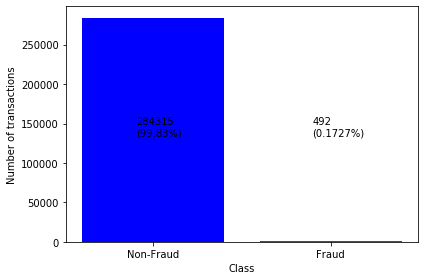

In [10]:
plt.bar(['Non-Fraud','Fraud'], data['Class'].value_counts(), color = ['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(data['Class'].value_counts()[0], 
                                         data['Class'].value_counts()[0]/data['Class'].count()*100),
             (0.20, 0.45), xycoords = 'axes fraction')
plt.annotate('{}\n({:.4}%)'.format(data['Class'].value_counts()[1], 
                                         data['Class'].value_counts()[1]/data['Class'].count()*100),
             (0.70, 0.45), xycoords = 'axes fraction')
plt.tight_layout()
plt.show()

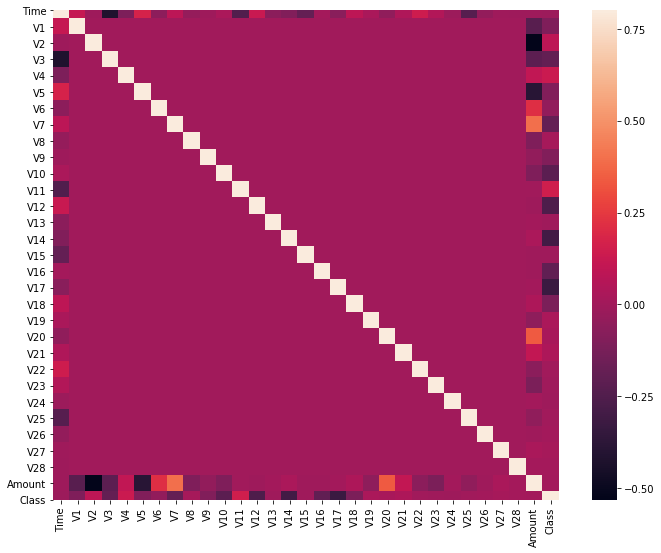

In [11]:
# Correlation matrix 
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show()

In [12]:
# Dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
y = data['Class']
print(X.shape)
print(y.shape)
# Getting the values for processing 
X_data = X.values
y_data = y.values

(284807, 30)
(284807,)


In [13]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
y_pred = model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

print('The model used is Logistic Regression')
acc = accuracy_score(y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec = precision_score(y_test,y_pred)
print('The precision is {}'.format(prec))
rec = recall_score(y_test,y_pred)
print('The recall is {}'.format(rec))
f1 = f1_score(y_test,y_pred)
print('The F1-Score is {}'.format(f1))
MCC=matthews_corrcoef(y_test,y_pred)
print('The Matthews correlation coefficient is{}'.format(MCC))

The model used is Logistic Regression
The accuracy is 0.9988764439450862
The precision is 0.7402597402597403
The recall is 0.5643564356435643
The F1-Score is 0.6404494382022472
The Matthews correlation coefficient is0.6458124503646318


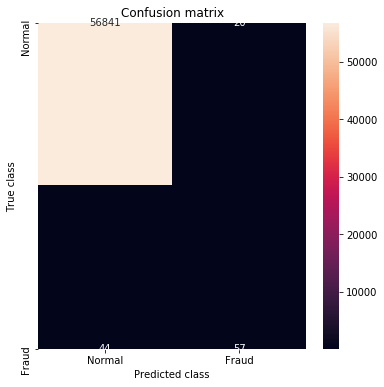

In [16]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize = (6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt = "d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [17]:
from sklearn.naive_bayes import GaussianNB

mod = GaussianNB()
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
pred = mod.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
confusion_matrix = pd.crosstab(y_test, pred, rownames = ['Actual'], colnames = ['Prediction'])
confusion_matrix

Prediction,0,1
Actual,,
0,56479,382
1,39,62


In [20]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.14      0.61      0.23       101

    accuracy                           0.99     56962
   macro avg       0.57      0.80      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [21]:
score = mod.score(X_test, y_test)
score

0.9926091078262701

In [22]:
# Import the decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Fit a logistic regression model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
y_pred = model.predict(X_test)

#Evaluating the classifier
#printing every score of the classifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

print('The model used is Decision Tree Classifier')
acc = accuracy_score(y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec = precision_score(y_test,y_pred)
print('The precision is {}'.format(prec))
rec = recall_score(y_test,y_pred)
print('The recall is {}'.format(rec))
f1 = f1_score(y_test,y_pred)
print('The F1-Score is {}'.format(f1))
MCC=matthews_corrcoef(y_test,y_pred)
print('The Matthews correlation coefficient is{}'.format(MCC))

The model used is Decision Tree Classifier
The accuracy is 0.9992451107756047
The precision is 0.7843137254901961
The recall is 0.7920792079207921
The F1-Score is 0.7881773399014778
The Matthews correlation coefficient is0.7878088236286135


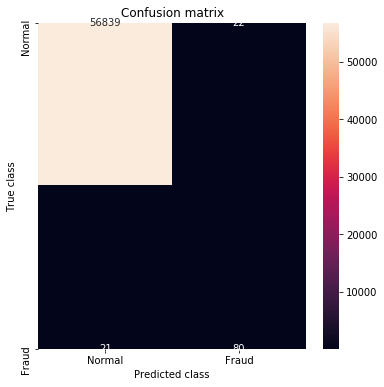

In [23]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = 'd');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [24]:
#visualizing the decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = list(X.columns)
export_graphviz(model,out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


True

In [25]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [26]:
p = abc.predict(X_test)
p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
abc.score(X_test, y_test)

0.9991573329588147

In [28]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# predictions
y_pred = rfc.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print('The model used is Random Forest classifier')
acc = accuracy_score(y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec = precision_score(y_test,y_pred)
print('The precision is {}'.format(prec))
rec = recall_score(y_test,y_pred)
print('The recall is {}'.format(rec))
f1 = f1_score(y_test,y_pred)
print('The F1-Score is {}'.format(f1))
MCC=matthews_corrcoef(y_test,y_pred)
print('The Matthews correlation coefficient is{}'.format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995259997893332
The precision is 0.9404761904761905
The recall is 0.7821782178217822
The F1-Score is 0.8540540540540541
The Matthews correlation coefficient is0.8574583279141744


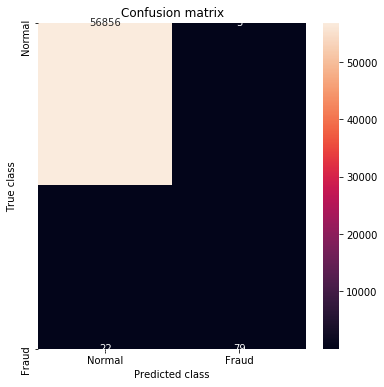

In [30]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

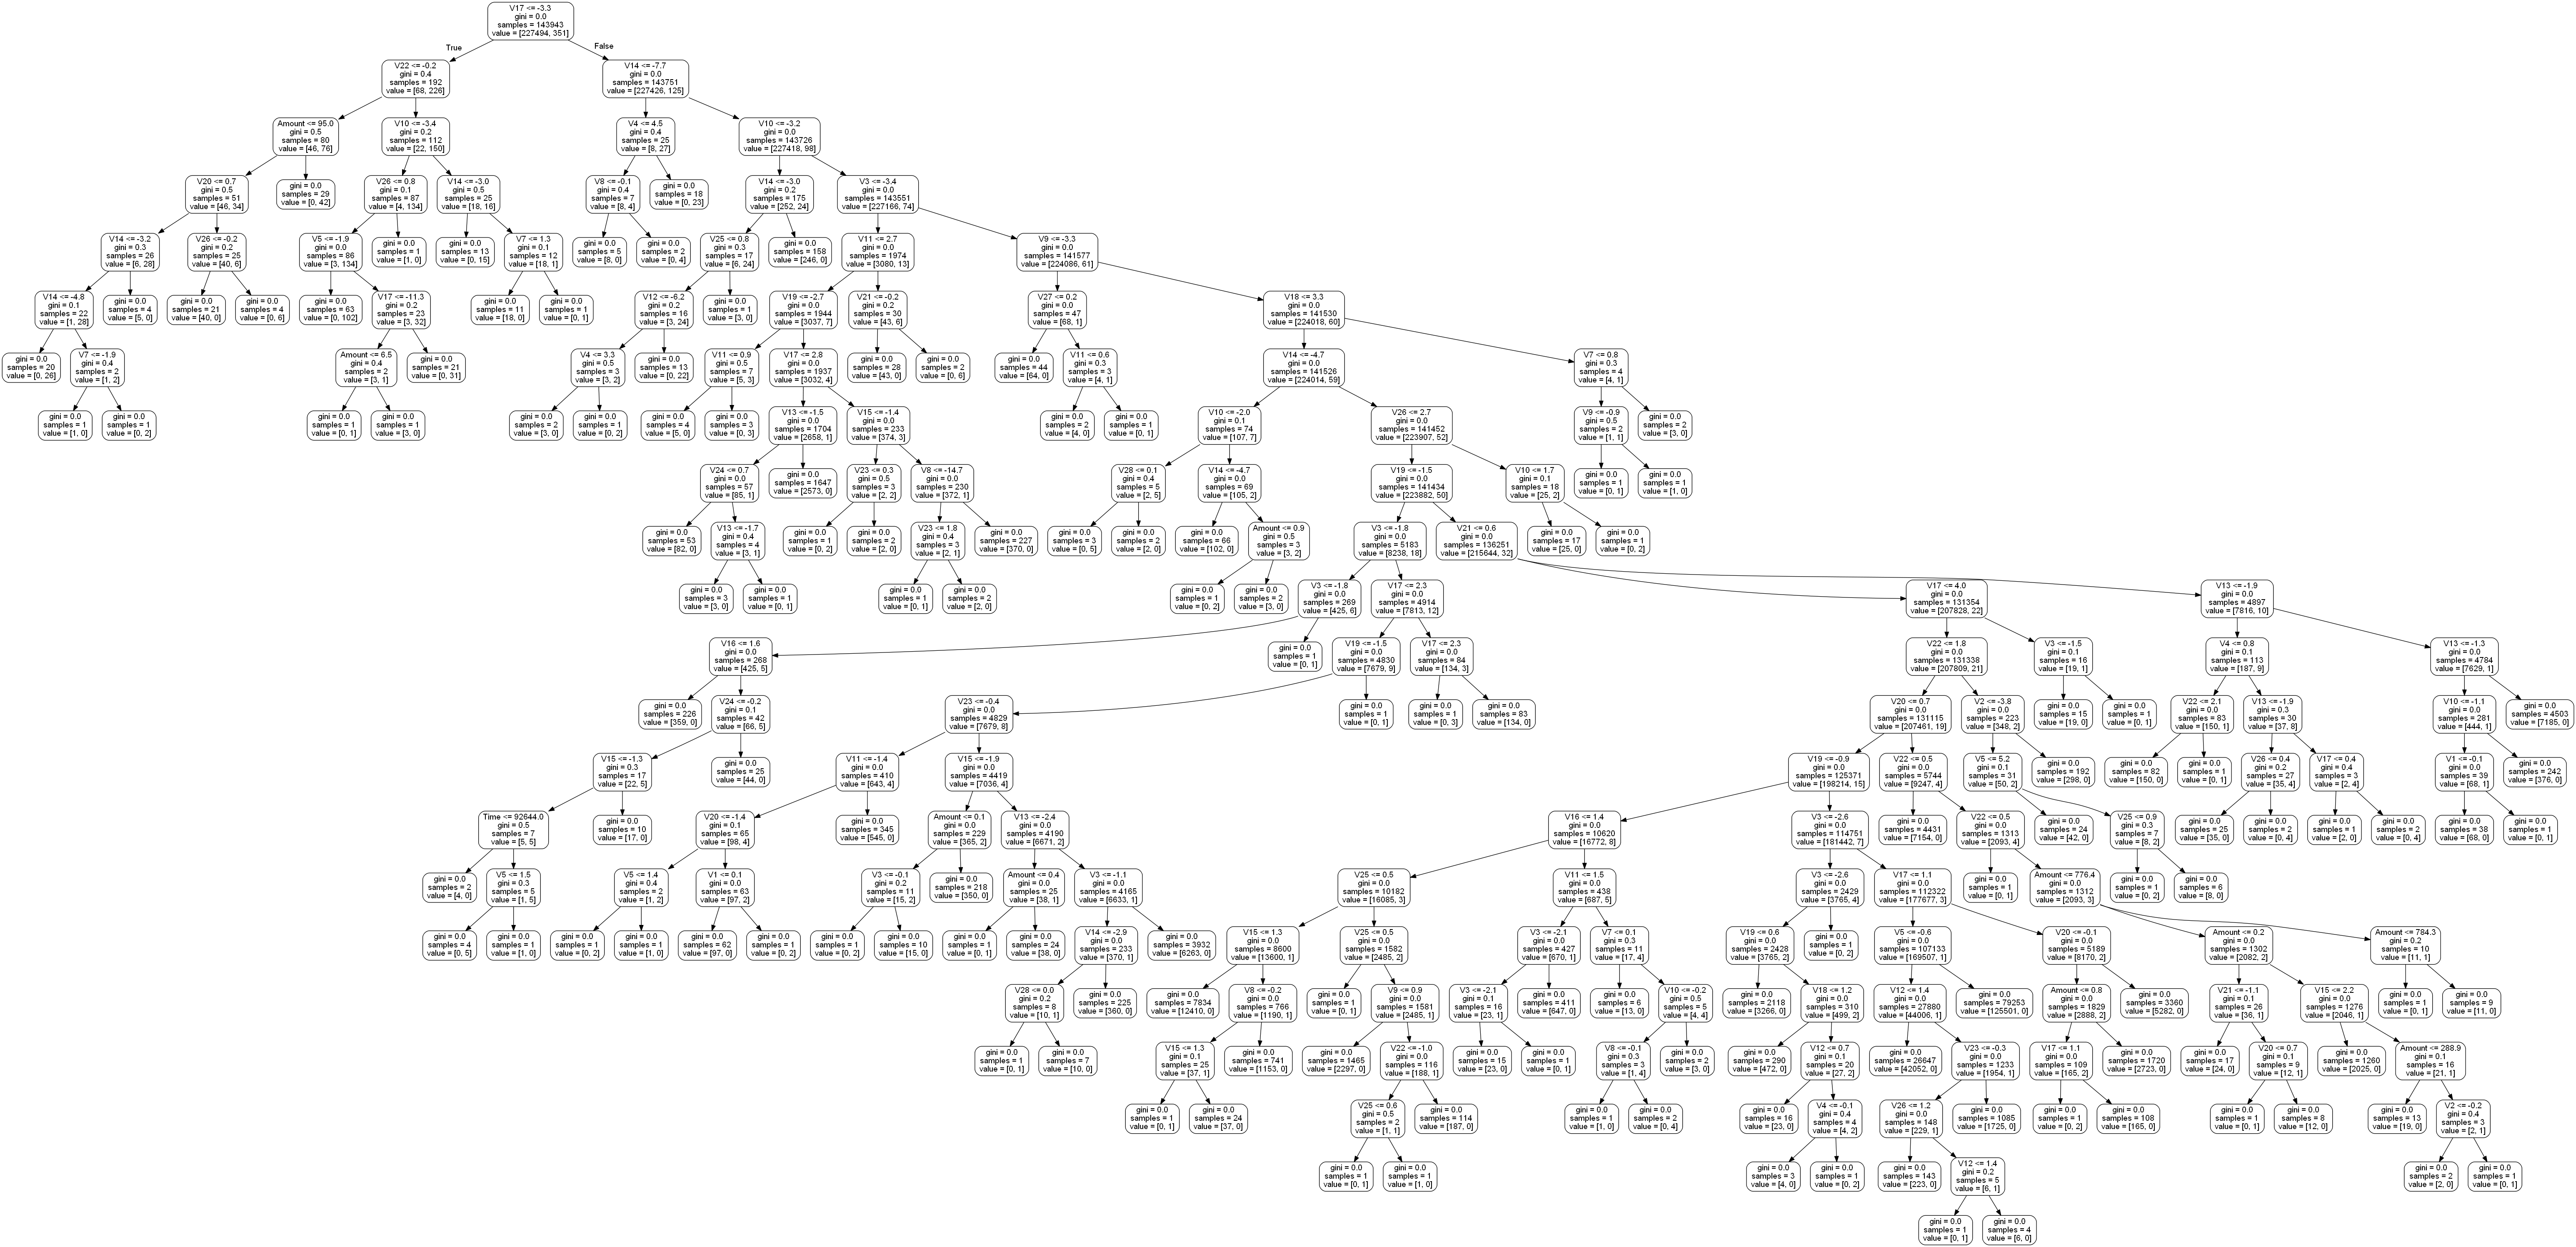

In [31]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph) = pydotplus.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))

In [32]:
# KMeans Clustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Split the data into train set and test set
train, test = train_test_split(data, test_size=0.3, random_state=0)

# Get the arrays of features and labels in train dataset
features_train = train.drop(['Time','Class'], axis = 1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

# Get the arrays of features and labels in test dataset
features_test = test.drop(['Time','Class'], axis = 1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values

# Normalize the features in both train and test dataset
features_train = normalize(features_train)
features_test = normalize(features_test)

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

model = KMeans(n_clusters = 2, random_state = 0)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

# Decide if model predicted label is aligned with true label 
true_negative, false_positive, false_negative, true_positive = confusion_matrix(labels_train,labels_train_predicted).ravel()
reassignflag = true_negative + true_positive < false_positive + false_negative
print(reassignflag)#Plot the data points and cluster centers
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')

labels_test_predicted = 1- labels_test_predicted

True


In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef

# Scoring kmeans
print('kmeans_precison_score:', precision_score(labels_test, labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test, labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test, labels_test_predicted))
print('kmeans_f1_score:', f1_score(labels_test, labels_test_predicted))
print('kmeans_matthews_corrcoef:', f1_score(labels_test, labels_test_predicted))

kmeans_precison_score: 0.005214302085720835
kmeans_recall_score: 0.6190476190476191
kmeans_accuracy_score: 0.7961565019954824
kmeans_f1_score: 0.010341496675947498
kmeans_matthews_corrcoef: 0.010341496675947498


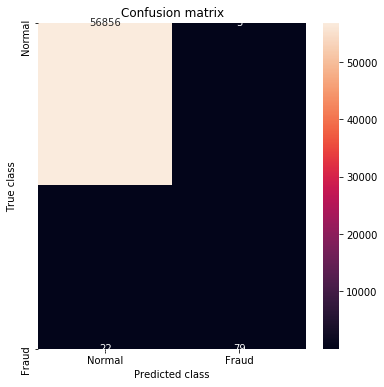

In [35]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()